In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import oledpy.dipole_emission as diem
from oledpy.dipole_emission import ThinFilmArchitecture
from numpy.lib.scimath import sqrt as csqrt
import warnings
warnings.filterwarnings('ignore')
df_nk=pd.read_csv(os.path.join('Reference Data','nk_library.csv'))

In [2]:
layer_names = ['SiO2','ITO','polyTPD','MAPbI3',
               'TPBi','Al','Air']
d = [0,150,25,10,40,100,0]
doping = [1,1,1,1,1,1,1]
active_layer = 3
# Define wavelengths of interest
arch = ThinFilmArchitecture(
    d=d,layer_names=layer_names,doping=doping,active_layer=active_layer,
    dipole_positions=[0.94],u_step=0.00025,u_stop=2,
    tau=1e-6,PLQY=0.85,
    vac_wavelengths=np.arange(750,790,10))#
arch.load_nk(df_nk=df_nk)
arch.init_pds_variables()

Active layer is: MAPbI3. 
 To change, call arch.set_active_layer(active_layer) Indexing starts at 0.
RZ not provided. Flat RZ will be assumed
No PL spectrum provided. Flat (white) emission will be assumed
Provided imaginary active layer index. Discarding imaginary part.


In [3]:
arch.show_wavelength_progress_bar=True
layer_idx=3
d_EML_list=np.arange(0,3000,60)
loop_data = arch.loop_over_single_layer_prop(
     layer_idx=3,layer_prop_list=d_EML_list,layer_prop='d')

Varied layer is: MAPbI3


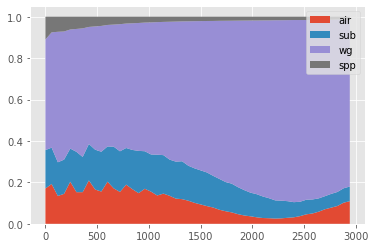

In [4]:
spectrally_integrated_modes = arch.analyze_modes_loop(d_EML_list,loop_data)
with plt.style.context('ggplot'):
    plt.stackplot(d_EML_list,spectrally_integrated_modes.T,
                 labels=spectrally_integrated_modes.columns,alpha=1)
    plt.legend()

In [5]:
with open('mode distribution.txt','w') as f: 
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)  #To prevent omission of data
    print(spectrally_integrated_modes, file=f)

    # print (d_EML_list) #debugging

In [6]:
outcoupling_array=['']*len(d_EML_list)
eta_out = np.zeros(len(d_EML_list))
PLQYeff = np.zeros(len(d_EML_list))
U = np.zeros(len(d_EML_list))
F = np.zeros(len(d_EML_list))
U_over_F = np.zeros(len(d_EML_list))
for d_idx,d_EML in enumerate(d_EML_list):
    K_total_array = loop_data['K_total_loop'][d_idx]
    K_out_array = loop_data['K_out_loop'][d_idx]
    outcoupling_array[d_idx]= arch.calc_outcoupled_fraction_array(
        K_total_array,K_out_array)
    arch.outcoupling_array = outcoupling_array[d_idx]
    lam_avg_eta_out,space_avg_eta_out = arch.spatially_average_outcoupling(return_values=True)
    eta_out[d_idx] = lam_avg_eta_out
    arch.K_total_array=K_total_array
    arch.K_out_array=K_out_array
    arch.purcell_factor(tau=1e-6,PLQY=0.85)
    PLQYeff[d_idx] = arch.PLQY_effective_avg
    U[d_idx]=arch.U_avg
    F[d_idx]=arch.F_avg

In [7]:
print(spectrally_integrated_modes)

         air       sub        wg       spp
0   0.170520  0.185277  0.534077  0.110126
1   0.192161  0.175583  0.556757  0.075499
2   0.134466  0.162640  0.630077  0.072818
3   0.144576  0.165184  0.618953  0.071286
4   0.203265  0.159879  0.575169  0.061686
5   0.152682  0.194828  0.593487  0.059004
6   0.152784  0.170071  0.620922  0.056223
7   0.209492  0.175934  0.565259  0.049314
8   0.165669  0.192332  0.595158  0.046842
9   0.155778  0.192221  0.607610  0.044390
10  0.203492  0.170019  0.586738  0.039751
11  0.171049  0.201211  0.589736  0.038003
12  0.153982  0.196135  0.613879  0.036004
13  0.189240  0.176785  0.600978  0.032997
14  0.167211  0.189511  0.611541  0.031737
15  0.148008  0.204130  0.617614  0.030249
16  0.169203  0.181225  0.621298  0.028274
17  0.155250  0.179557  0.637749  0.027444
18  0.136803  0.196930  0.640105  0.026161
19  0.145755  0.185792  0.643419  0.025034
20  0.135189  0.174660  0.665888  0.024263
21  0.121612  0.178572  0.676323  0.023492
22  0.11904